![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
!ls data/zippedData

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


## IMPORT ALL DATA

In [3]:
#Box Office Mojo Data (bom)
bom_moviegross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')

#IMDB Data (imdb)
imdb_name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz') 
imdb_title_akas_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

#Rotten Tomatoes Data (rt). 
#rt_movie_info_df = pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep = '/t', encoding = 'windows-1254')
#rt_reviews_df =  pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep = '/t', encoding = 'windows-1254')

#The Movie Database (tmdb)
tmdb_movies_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

#The Numbers (tn)
tn_movie_budgets_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

## Preview DataFrames

In [5]:
#bom_moviegross_df.head()

In [5]:
#imdb_name_basics.head()

In [6]:
# imdb_title_akas_df.head()

In [7]:
# imdb_title_basics_df.head()

In [8]:
# imdb_title_crew_df.head()

In [9]:
# imdb_title_principals_df.head()

In [10]:
# imdb_title_ratings_df.head()

In [11]:
# rt_move_info_df.head()

In [12]:
#rt_reviews_df.head()

In [13]:
#tmdb_movies_df.head()

In [14]:
# tn_movie_budgets_df.head()

## Check for missing values

In [6]:
#bom_moviegross_df.isna().sum()

In [16]:
#imdb_name_basics.isna().sum()

In [17]:
#imdb_title_akas_df.isna().sum()

In [18]:
#imdb_title_basics_df.isna().sum()

In [19]:
#imdb_title_crew_df.isna().sum()

In [20]:
#imdb_title_principals_df.isna().sum()

In [21]:
#imdb_title_ratings_df.isna().sum()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [7]:
# Here you run your code to clean the data

## Box Office Mojo Data

In [4]:
bom_moviegross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_moviegross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

In [6]:
bom_moviegross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
bom_moviegross_df['foreign_gross'].shape

(3387,)

Let's find the percentage of data that is null!

In [8]:
num_missing_bom_foreigngross = bom_moviegross_df.isna().sum()['foreign_gross']
total_moviegross_entries = len(bom_moviegross_df['foreign_gross'])
percentage_missing_foreign = num_missing_bom_foreigngross / total_moviegross_entries
print(percentage_missing_foreign)

0.3985828166519043


Hmmmmm, so 40% of the data for the 'foreign_gross' column is missing and classified as a NaN. 

Let's dig a little deeper.

In [9]:
len(list(bom_moviegross_df['foreign_gross'].unique()))

1205

There are 1205 unique values in this series. What type of data are they?

In [10]:
non_standard = []
for x in list(bom_moviegross_df['foreign_gross'].unique()):
    if type(x) != int and type(x) != float:
        non_standard.append(x)
    else:
        pass

In [11]:
len(non_standard)

1204

In [12]:
[type(x) for x in non_standard if type(x) != str] #All the unique values are strings

[]

Let's summarize what we have so far:
    
    3387 total entries
    1350 null values
    1204 str type values

This leaves:
    
    833 int/float type values

Let's convert every item in this series to float in order to remove the 'str' types

In [13]:
foreign_gross_numeric = pd.to_numeric(bom_moviegross_df['foreign_gross'], errors = 'coerce', downcast = 'float') #Converted from str, int, float to float

In [14]:
foreign_gross_numeric.describe()

count         2032.0
mean      75057048.0
std      137529360.0
min            600.0
25%        3775000.0
50%       18900000.0
75%       75050000.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [15]:
bom_moviegross_df['foreign_gross'] = foreign_gross_numeric #Assigned new series in place of original df series

In [16]:
bom_moviegross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [17]:
bom_moviegross_df['foreign_gross'].describe()

count         2032.0
mean      75057048.0
std      137529360.0
min            600.0
25%        3775000.0
50%       18900000.0
75%       75050000.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [18]:
mean_adjusted = bom_moviegross_df['foreign_gross'].fillna(75057048)

In [19]:
mean_adjusted.describe()

count         3387.0
mean      75057040.0
std      106514048.0
min            600.0
25%       11750000.0
50%       75057048.0
75%       75057048.0
max      960499968.0
Name: foreign_gross, dtype: float64

In [20]:
mean_adjusted_removed = bom_moviegross_df[(bom_moviegross_df['foreign_gross'] > 1000000) & (bom_moviegross_df['domestic_gross'] > 1000000)]

In [21]:
mean_adjusted_removed.shape

(1358, 5)

In [22]:
mean_adjusted_removed.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Let's just remove everything that doesn't have a domestic gross value

In [23]:
mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)

<ipython-input-23-d442058cf311>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_adjusted_removed.dropna(axis=0, how='any', inplace=True)


In [24]:
mean_adjusted_removed

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691299968.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300032.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3252,Papillon (2018),BST,2300000.0,2200000.0,2018
3257,Don't Worry He Won't Get Far on Foot,Amazon,1400000.0,2500000.0,2018
3258,A Private War,Aviron,1600000.0,2200000.0,2018
3263,The Front Runner,Sony,2000000.0,1200000.0,2018


In [25]:
mean_adjusted_removed.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Let's drop the columns that I will not be using

In [26]:
mean_adjusted_removed.drop('year', axis=1, inplace=True)

C:\Users\camla\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
mean_adjusted_removed.drop('studio', axis=1, inplace=True)

In [28]:
mean_adjusted_removed

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691299968.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300032.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0
...,...,...,...
3252,Papillon (2018),2300000.0,2200000.0
3257,Don't Worry He Won't Get Far on Foot,1400000.0,2500000.0
3258,A Private War,1600000.0,2200000.0
3263,The Front Runner,2000000.0,1200000.0


In [29]:
final_moviegross_df = mean_adjusted_removed.set_index('title')

In [30]:
final_moviegross_df['total_gross'] = final_moviegross_df['domestic_gross'] + final_moviegross_df['foreign_gross']

In [31]:
final_moviegross_df

,domestic_gross,foreign_gross,total_gross
title,,,
Toy Story 3,415000000.0,652000000.0,1.067000e+09
Alice in Wonderland (2010),334200000.0,691299968.0,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,296000000.0,664300032.0,9.603000e+08
Inception,292600000.0,535700000.0,8.283000e+08
Shrek Forever After,238700000.0,513900000.0,7.526000e+08
...,...,...,...
Papillon (2018),2300000.0,2200000.0,4.500000e+06
Don't Worry He Won't Get Far on Foot,1400000.0,2500000.0,3.900000e+06
A Private War,1600000.0,2200000.0,3.800000e+06


## IMDB Title_basics data

Let's clean the imdb_title_basics_df

In [32]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [33]:
imdb_title_index = imdb_title_basics_df.set_index('primary_title')

In [34]:
imdb_title_index

,tconst,original_title,start_year,runtime_minutes,genres
primary_title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
Kuambil Lagi Hatiku,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka,tt9916706,Dankyavar Danka,2013,NaN,Comedy


In [35]:
imdb_title_basics_df.shape

(146144, 6)

In [36]:
imdb_title_index_dropped = imdb_title_index.drop('tconst', axis=1)

In [37]:
imdb_title_index_dropped

,original_title,start_year,runtime_minutes,genres
primary_title,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [38]:
imdb_title_index_removedna = imdb_title_index_dropped.dropna(axis=0, how = 'any')

In [39]:
imdb_title_index_removedna

,original_title,start_year,runtime_minutes,genres
primary_title,,,,
Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...
Drømmeland,Drømmeland,2019,72.0,Documentary
The Rehearsal,O Ensaio,2019,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary


In [40]:
dropped_imdb_title = imdb_title_index_removedna.drop(['original_title', 'start_year'], axis=1)

In [41]:
dropped_imdb_title

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy
...,...,...
Drømmeland,72.0,Documentary
The Rehearsal,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,84.0,Documentary


In [42]:
final_imdb_title_df = dropped_imdb_title

In [43]:
final_imdb_title_df

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy
...,...,...
Drømmeland,72.0,Documentary
The Rehearsal,51.0,Drama
Illenau - die Geschichte einer ehemaligen Heil- und Pflegeanstalt,84.0,Documentary


Here are the two DataFrames we have so far:

In [44]:
# final_imdb_title_df

In [45]:
# final_moviegross_df

## tn_movie_budgets_df

In [46]:
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [47]:
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].map(lambda x: x.lstrip('$'))

In [48]:
tn_movie_budgets_df['domestic_gross'] = tn_movie_budgets_df['domestic_gross'].map(lambda x: x.lstrip('$'))

In [49]:
tn_movie_budgets_df['worldwide_gross'] = tn_movie_budgets_df['worldwide_gross'].map(lambda x: x.lstrip('$'))

In [51]:
tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"] = tn_movie_budgets_df.loc[:, "production_budget":"worldwide_gross"].replace(",","", regex=True).astype('int64')

In [54]:
tn_movie_budgets_df.rename(columns = {'movie':"primary_title"}, inplace = True)
tn_movie_budgets_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [55]:
final_imdb_title_df.rename(columns = {'primary_title':"title"}, inplace = True)
final_imdb_title_df.head()

,runtime_minutes,genres
primary_title,,
Sunghursh,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,114.0,"Biography,Drama"
The Other Side of the Wind,122.0,Drama
The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
A Thin Life,75.0,Comedy


In [56]:
final_df = tn_movie_budgets_df.merge(final_imdb_title_df, on= 'primary_title', how= 'inner')
final_df.head()

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi"


In [57]:
final_df["total_gross"] = final_df["domestic_gross"] + final_df["worldwide_gross"]
final_df

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",1862019831
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",2726949682
...,...,...,...,...,...,...,...,...,...
3304,67,"Apr 28, 2006",Clean,10000,138711,138711,70.0,"Comedy,Drama,Horror",277422
3305,68,"Jul 6, 2001",Cure,10000,94596,94596,93.0,Drama,189192
3306,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,95.0,"Comedy,Drama",9168
3307,78,"Dec 31, 2018",Red 11,7000,0,0,77.0,"Horror,Sci-Fi,Thriller",0


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [90]:
count = final_df['genres'].str.split(',', expand=True).stack().value_counts()

In [63]:
genres = final_df.copy()

In [135]:
#Find the total frequency of each genre
genres[['genre1', 'genre2', 'genre3']] = final_df['genres'].str.split(',', expand=True)
genres

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,total_gross,genre1,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,93.0,Horror,3536852904,Horror,None,None
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,136.0,"Action,Adventure,Fantasy",1286727750,Action,Adventure,Fantasy
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,113.0,"Action,Adventure,Sci-Fi",192524700,Action,Adventure,Sci-Fi
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,141.0,"Action,Adventure,Sci-Fi",1862019831,Action,Adventure,Sci-Fi
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,149.0,"Action,Adventure,Sci-Fi",2726949682,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,67,"Apr 28, 2006",Clean,10000,138711,138711,70.0,"Comedy,Drama,Horror",277422,Comedy,Drama,Horror
3305,68,"Jul 6, 2001",Cure,10000,94596,94596,93.0,Drama,189192,Drama,None,None
3306,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,95.0,"Comedy,Drama",9168,Comedy,Drama,None
3307,78,"Dec 31, 2018",Red 11,7000,0,0,77.0,"Horror,Sci-Fi,Thriller",0,Horror,Sci-Fi,Thriller


Now, I need to group the genres and add the total_gross for each genre entry

In [95]:
genre1_total_gross = genres.groupby('genre1')['total_gross'].sum()

In [96]:
genre2_total_gross = genres.groupby('genre2')['total_gross'].sum()

In [97]:
genre3_total_gross = genres.groupby('genre3')['total_gross'].sum()

Now I have to add all of these genre total together with each other, genre specific. I will use the .add() method because it allows for me to add all genres at the same time, while also dealing with any missing values!

In [98]:
genre_total_gross = genre1_total_gross.add(genre2_total_gross, fill_value=0).add(genre3_total_gross, fill_value=0)

In [93]:
#Drop the 'News' and 'Reality TV' rows because they have minimal observations
final_genre_total_gross = genre_total_gross.drop(['News', 'Reality-TV'])

In [109]:
final_genre_total_gross

Action         1.656856e+11
Adventure      1.813454e+11
Animation      5.803311e+10
Biography      2.527168e+10
Comedy         1.198475e+11
Crime          3.573592e+10
Documentary    4.384104e+10
Drama          1.435821e+11
Family         4.350501e+10
Fantasy        5.552356e+10
History        9.706273e+09
Horror         3.438162e+10
Music          8.152216e+09
Musical        1.026012e+10
Mystery        2.334563e+10
Romance        3.181218e+10
Sci-Fi         6.934260e+10
Sport          7.769218e+09
Thriller       6.062506e+10
War            2.894740e+09
Western        2.052660e+09
Name: total_gross, dtype: float64

Same process as above, just with worldwide_gross and domestic_gross series

In [102]:
genre1_worldwide_gross = genres.groupby('genre1')['worldwide_gross'].sum()

In [103]:
genre2_worldwide_gross = genres.groupby('genre2')['worldwide_gross'].sum()

In [105]:
genre3_worldwide_gross = genres.groupby('genre3')['worldwide_gross'].sum()

In [106]:
genre_total_worldwide_gross = genre1_worldwide_gross.add(genre2_worldwide_gross, fill_value=0).add(genre3_worldwide_gross, fill_value=0)

In [107]:
final_genre_worldwide_gross = genre_total_worldwide_gross.drop(['News', 'Reality-TV'])

In [108]:
final_genre_worldwide_gross

Action         1.206906e+11
Adventure      1.334393e+11
Animation      4.241301e+10
Biography      1.696580e+10
Comedy         8.268185e+10
Crime          2.446896e+10
Documentary    2.975371e+10
Drama          9.730270e+10
Family         3.052068e+10
Fantasy        4.064067e+10
History        6.590382e+09
Horror         2.386472e+10
Music          5.563921e+09
Musical        7.189620e+09
Mystery        1.607777e+10
Romance        2.156480e+10
Sci-Fi         5.052203e+10
Sport          5.139521e+09
Thriller       4.306257e+10
War            1.993057e+09
Western        1.353601e+09
Name: worldwide_gross, dtype: float64

In [110]:
genre1_domestic_gross = genres.groupby('genre1')['domestic_gross'].sum()

In [111]:
genre2_domestic_gross = genres.groupby('genre2')['domestic_gross'].sum()

In [112]:
genre3_domestic_gross = genres.groupby('genre3')['domestic_gross'].sum()

In [113]:
genre_total_domestic_gross = genre1_domestic_gross.add(genre2_domestic_gross, fill_value=0).add(genre3_domestic_gross, fill_value=0)

In [115]:
final_genre_total_domestic_growth = genre_total_domestic_gross.drop(['News', 'Reality-TV'])

In [116]:
final_genre_total_domestic_growth

Action         4.499498e+10
Adventure      4.790608e+10
Animation      1.562010e+10
Biography      8.305879e+09
Comedy         3.716565e+10
Crime          1.126696e+10
Documentary    1.408732e+10
Drama          4.627944e+10
Family         1.298434e+10
Fantasy        1.488288e+10
History        3.115890e+09
Horror         1.051690e+10
Music          2.588295e+09
Musical        3.070505e+09
Mystery        7.267862e+09
Romance        1.024738e+10
Sci-Fi         1.882057e+10
Sport          2.629697e+09
Thriller       1.756249e+10
War            9.016833e+08
Western        6.990589e+08
Name: domestic_gross, dtype: float64

In [118]:
final_gross_df = pd.concat([final_genre_total_domestic_growth, final_genre_worldwide_gross, final_genre_total_gross], axis=1).reset_index()

In [127]:
final_gross_df_cleaned = final_gross_df.set_index('index')
final_gross_df_cleaned

,domestic_gross,worldwide_gross,total_gross
index,,,
Action,4.499498e+10,1.206906e+11,1.656856e+11
Adventure,4.790608e+10,1.334393e+11,1.813454e+11
Animation,1.562010e+10,4.241301e+10,5.803311e+10
Biography,8.305879e+09,1.696580e+10,2.527168e+10
Comedy,3.716565e+10,8.268185e+10,1.198475e+11
Crime,1.126696e+10,2.446896e+10,3.573592e+10
Documentary,1.408732e+10,2.975371e+10,4.384104e+10
Drama,4.627944e+10,9.730270e+10,1.435821e+11
Family,1.298434e+10,3.052068e+10,4.350501e+10


Now I will make a stacked bar graph!!! Each genre's bar will be split by "domestic_gross" and "foreign_gross", equaling the total bar, which is total_gross

In [129]:
bar_plotdata = final_gross_df_cleaned.drop('total_gross', axis=1)

In [130]:
bar_plotdata

,domestic_gross,worldwide_gross
index,,
Action,4.499498e+10,1.206906e+11
Adventure,4.790608e+10,1.334393e+11
Animation,1.562010e+10,4.241301e+10
Biography,8.305879e+09,1.696580e+10
Comedy,3.716565e+10,8.268185e+10
Crime,1.126696e+10,2.446896e+10
Documentary,1.408732e+10,2.975371e+10
Drama,4.627944e+10,9.730270e+10
Family,1.298434e+10,3.052068e+10


Text(0, 0.5, 'Dollars (in billions of dollars)')

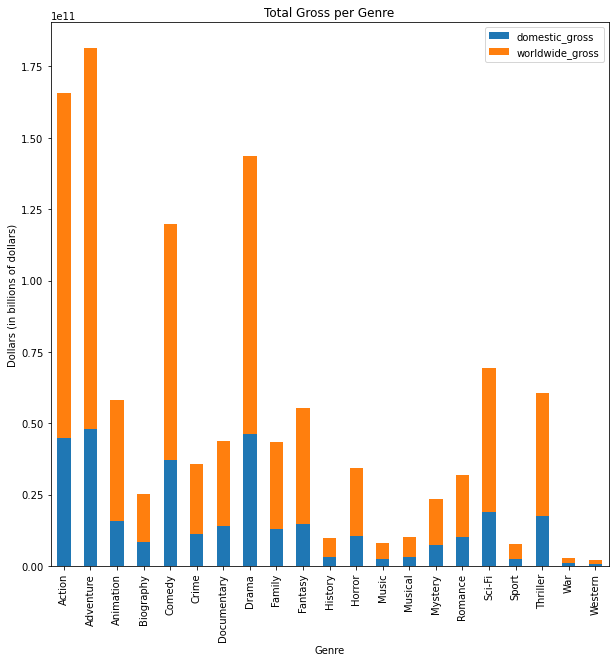

In [133]:
bar_plotdata.plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Total Gross per Genre')
plt.xlabel('Genre')
plt.ylabel('Dollars (in billions of dollars)')

1. What is the most profitable kind of movie by genre?
2. What is the optimal runtime of each movie per genre?
3. What season is the best time to release per genre?

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***